04 분류 (classification)
==

01 분류의 개요
--

> 레이블이 있는 데이터의 패턴을 알고리즘으로 인지한 뒤 새롭게 관측된 데이터에 대해 레이블을 판별

- 나이브 베이즈: 베이즈 통게와 생성 모델 기반
- 로지스틱 회귀: 독립, 종속변수의 선형 관계성
- 결정 트리: 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신: 개별 클래스 간의 최대 분류 마진 찾기
- 최소 근접 알고리즘: 근접 거리 기준
- 신경망
- 앙상블

__앙상블__ 
- 서로 다른/또는 같은 알고리즘 결합, 대부분은 동일한 알고리즘 결합, 일반적으로 기본 알고리즘으로 결정 트리 사용

1. 배깅(Bagging)
    - 랜덤 포레스트
2. 부스팅(Boosting)
    - 그래디언트 부스팅 -> XgBoost, LightGBM: 수행 시간 단축

- 결정 트리
    * 매우 쉽고 유연하게 적용할 수 있으며 데이터 스케일링/정규화 등의 영향이 적음
    * 예측 성능 향상 위한 복잡한 규칙 구조 -> 과적합으로 인한 예측 성능 저하 단점
    * 앙상블 기법에서는 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 업데이트하며 예측 성능 향상시키는데, 결정 트리는 좋은 약한 학습기가 됨

02 결정 트리
--

- 규칙 노드(Decision Node): 규칙 조건
- 리프 노드(Leaf Node): 결정된 클래스 값

데이터 피처가 결합해 새로운 규칙 조건을 만들 때마다 규칙 노드가 만들어지고 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성

많은 규칙 -> 과적합, 즉 트리의 깊이(depth)가 깊어질수록 예측 성능 저하

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 규칙을 정해야 함
-> 최대한 균일한 데이터 세트를 구성하도록 트리를 분할(split)

__정보 균일도 측정 방법__
- 엔트로피를 이요한 정보 이득 지수 (Information Gain)
    * 1-엔트로피 지수(혼잡도)
    * 정보 이득이 높은 속성을 기준으로 분할
- 지니 계수
    * 0이 가장 평등하고 1로 갈수록 불평등
    * 데이터가 다양한 값을 가질수록 평등하고 특정 값으로 쏠릴 경우 불평등
    * 다양성이 낮을 수록 균일도가 높으므로 1로 갈수록 균일도가 높으며 지니계수가 높은 속성을 기준으로 분할
    
scikit learn DecisionTreeClassifier는 지니계수 이용

결정 트리는 일반적으로 데이터셋을 분할하는 데 지니 계수가 높은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

__특징__
- 쉽고 직관적이며 정보의 균일도만 신경쓰므로 일반적으로 스케일링/정규화 작업 필요 없음
- 단점은 과적합으로 정확도가 떨어짐 -> 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움

In [2]:
# 시각화: Graphviz 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_tet, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

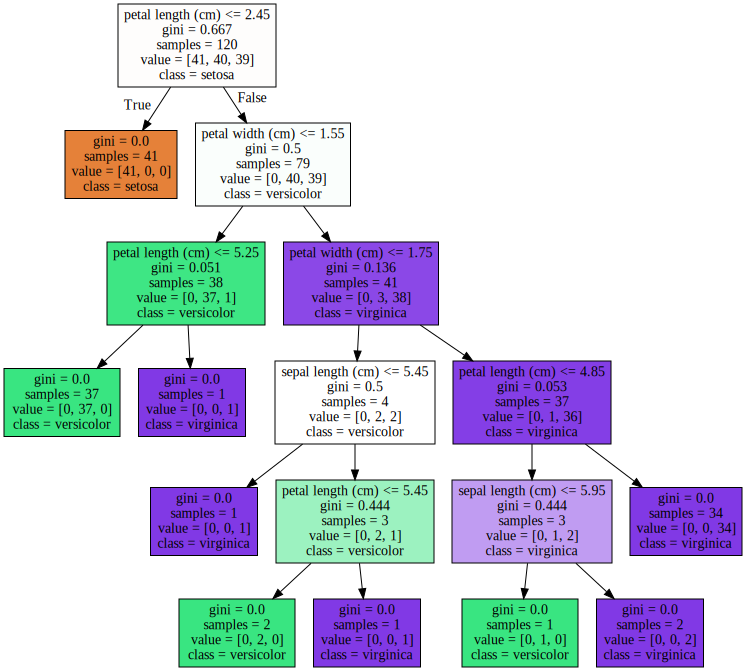

In [5]:
from sklearn.tree import export_graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin' # graphviz path 오류 해결

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)
# dot 파일?

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#dot_data = export_graphviz(df_clf, out_file=None, class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)
#graphviz.Source(dot_data)

자식 노드가 없는 노드는 리프 노드 - 최종 클래스 값이 결정됨

자식 노드가 없는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가짐

결정 트리는 어떤 속성을 규칙 조건으로 선택하느냐가 중요함

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


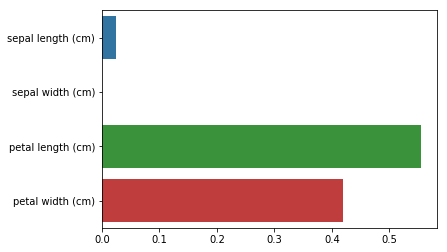

In [9]:
# feature_importances_
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

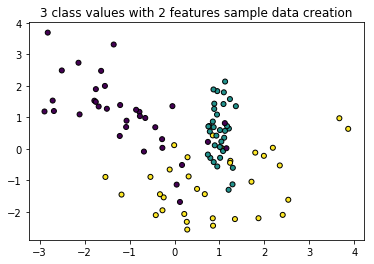

In [11]:
# 과적합
from sklearn.datasets import make_classification

plt.title('3 class values with 2 features sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


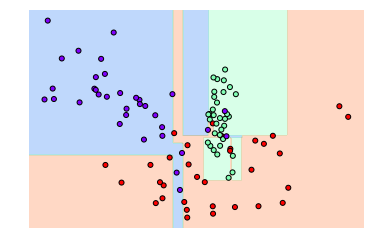

In [14]:
# 특정한 트리 생성 제약 없는 결정 트리 학습
df_clf = DecisionTreeClassifier().fit(X_features, y_labels)

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

visualize_boundary(dt_clf, X_features, y_labels)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


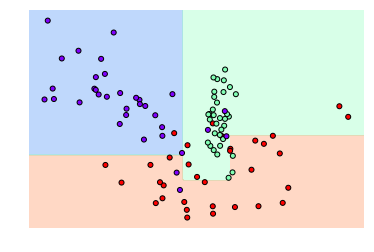

In [15]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)